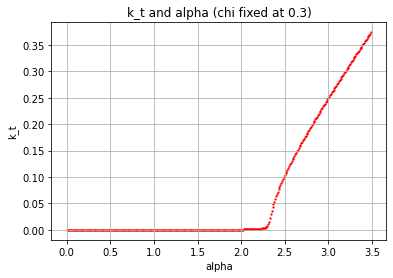

check_list: [[0.0, 0.0, 0.0], [0.01, 1.1656626163677455e-07, 2.679298842737854e-09], [0.02, 3.4622354745368963e-07, 2.138838282542967e-08], [0.03, 8.002623697083798e-07, 7.204863972966759e-08], [0.04, 1.5895425875518627e-06, 1.7049777745046298e-07], [0.05, 5.473958524492479e-07, 3.0586366347042036e-09], [0.06, 7.027759983822631e-07, 6.327534089207677e-09], [0.07, 8.932419806836118e-07, 1.1699729502026444e-08], [0.08, 1.1309189274239844e-06, 1.992472117108151e-08], [0.09, 1.4297256458494055e-06, 3.1864606128944866e-08], [0.1, 1.805323756058957e-06, 4.849493313113196e-08], [0.11, 2.2751409976484228e-06, 7.090293025218469e-08], [0.12, 2.8595434989214528e-06, 1.0031001938551952e-07], [0.13, 3.5772377805499324e-06, 1.3799156848727196e-07], [0.14, 4.451753651315805e-06, 1.8538992210420626e-07], [0.15, 5.507243983427028e-06, 2.4404013307084114e-07], [0.16, 6.769585513986059e-06, 3.1559406371610124e-07], [0.17, 8.266257585901729e-06, 4.018160844882898e-07], [0.18, 1.0026347581598498e-05, 5.045

In [1]:
#State Evoluation (second version fix the chi)
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

def y_s(p,t):#using iteration to solve y^*
    eps = 0.0001 #epsilon
    y_st = 1 #initial y^*
    flag =True
    while flag:
        y_new = np.tanh(p+np.sqrt(t)*y_st)*np.sqrt(t)
        if LA.norm(y_new - y_st) < eps: #update until threshold met
            flag = False
            return y_new #return the solution
            break
        y_st = y_new

def F(p,t): #F function
    return y_s(p,t)/(np.sqrt(t))

def T(p,t): #T function
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def k_sigma(alpha):
    k_t = 1
    sigma_s2 = 1
    sigma_t2 = 10
    #alpha = 1
    lamb = 3
    chi = 0.3
    eps = 0.0001
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([0,0])
    iter_ = 0
    mu = 0
    sigma = 1
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        #z = np.random.normal(mu,sigma,1000)
        sum_f = 0
        sum_f2 = 0
        for z in range(-20,21,1):
            sum_f += np.exp(-1/2*z**2)*F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi)/np.sqrt(2*np.pi)
            sum_f2 += np.exp(-1/2*z**2)*F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi)**2/np.sqrt(2*np.pi)
        k_new = alpha*chi*sum_f
        sigma_new = alpha*chi**2*sum_f2
        parameter_new = np.array([k_new,sigma_new])
        k_t = k_new
        sigma_t2 = sigma_new
        iter_+=1
    return parameter_new
check_list = []
for alpha in np.arange(0,3.5,0.01):
    plt.scatter(alpha,k_sigma(alpha)[0],c="r",s=1.5)
    check_list.append([alpha,k_sigma(alpha)[0],k_sigma(alpha)[1]])
plt.title("k_t and alpha (chi fixed at 0.3)")
plt.ylabel("k_t")
plt.xlabel("alpha")
plt.grid()
plt.show()
print("check_list:",check_list)

In [4]:
for i in range(len(check_list)):
    print(check_list[i])

[0.0, 0.0, 0.0]
[0.01, 1.1656626163677455e-07, 2.679298842737854e-09]
[0.02, 3.4622354745368963e-07, 2.138838282542967e-08]
[0.03, 8.002623697083798e-07, 7.204863972966759e-08]
[0.04, 1.5895425875518627e-06, 1.7049777745046298e-07]
[0.05, 5.473958524492479e-07, 3.0586366347042036e-09]
[0.06, 7.027759983822631e-07, 6.327534089207677e-09]
[0.07, 8.932419806836118e-07, 1.1699729502026444e-08]
[0.08, 1.1309189274239844e-06, 1.992472117108151e-08]
[0.09, 1.4297256458494055e-06, 3.1864606128944866e-08]
[0.1, 1.805323756058957e-06, 4.849493313113196e-08]
[0.11, 2.2751409976484228e-06, 7.090293025218469e-08]
[0.12, 2.8595434989214528e-06, 1.0031001938551952e-07]
[0.13, 3.5772377805499324e-06, 1.3799156848727196e-07]
[0.14, 4.451753651315805e-06, 1.8538992210420626e-07]
[0.15, 5.507243983427028e-06, 2.4404013307084114e-07]
[0.16, 6.769585513986059e-06, 3.1559406371610124e-07]
[0.17, 8.266257585901729e-06, 4.018160844882898e-07]
[0.18, 1.0026347581598498e-05, 5.045848486433684e-07]
[0.19, 2.8339